<a href="https://colab.research.google.com/github/SuccessSoham/Gen-AI/blob/main/Apple_Stock_Analysis_and_Prediction_AI_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock Analysis and Prediction AI Agent

This notebook analyzes historical Apple stock data, visualizes trends, and builds a predictive model to forecast future prices. It also includes a Gradio-based web UI for interactive exploration.


In [12]:
pip install gradio --upgrade

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn gradio tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import gradio as gr

In [3]:
# Load the dataset
data = pd.read_csv('/content/Apple_1980_2024.csv')

# Preview the data
print(data.head(3))
print(data.tail(3))
print(data.info())


         Date      Open      High       Low     Close     Volume
0  12-12-1980  0.098834  0.099264  0.098834  0.098834  469033600
1  15-12-1980  0.094108  0.094108  0.093678  0.093678  175884800
2  16-12-1980  0.087232  0.087232  0.086802  0.086802  105728000
             Date        Open        High         Low       Close    Volume
11081  26-11-2024  233.330002  235.570007  233.330002  235.059998  45986200
11082  27-11-2024  234.470001  235.690002  233.809998  234.929993  33498400
11083  29-11-2024  234.809998  237.809998  233.970001  237.330002  28481400
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11084 non-null  object 
 1   Open    11084 non-null  float64
 2   High    11084 non-null  float64
 3   Low     11084 non-null  float64
 4   Close   11084 non-null  float64
 5   Volume  11084 non-null  int64  
dtypes: float64(4), int64(1), ob

In [4]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Sort by date
data = data.sort_values('Date')

# Set date as index
data.set_index('Date', inplace=True)

# Check for missing values
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [5]:
# Summary statistics
data.describe()


,Open,High,Low,Close,Volume
count,11084.000000,11084.000000,11084.000000,11084.000000,1.108400e+04
mean,23.037640,23.283614,22.803433,23.054665,3.159941e+08
std,48.702601,49.214823,48.226629,48.747740,3.349931e+08
min,0.038245,0.038245,0.037815,0.037815,0.000000e+00
25%,0.242810,0.248056,0.237830,0.242879,1.116140e+08
50%,0.441766,0.449761,0.434024,0.441767,2.039756e+08
75%,18.014029,18.142818,17.754966,17.970764,3.968776e+08
max,235.947003,237.809998,234.192340,237.330002,7.421641e+09


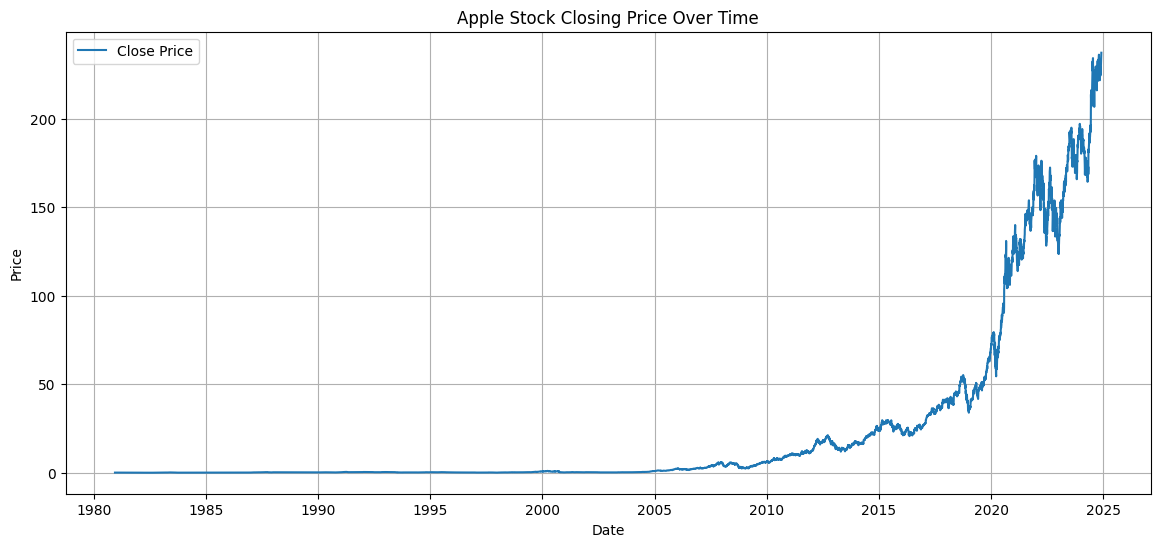

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Apple Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


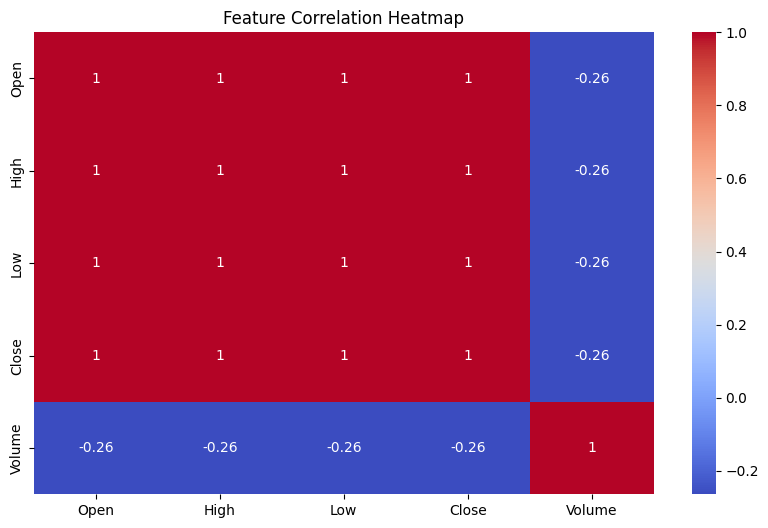

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [7]:
# Use previous days' closing prices to predict the next day's price
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test, predictions)

# Round to 4 decimal places
r2_rounded = round(r2, 4)

print("R² Score:", r2_rounded)

Mean Squared Error: 2.7769365285814063
R² Score: 0.9993


Mean Squared Error: 2.7769365285814063
R² Score: 0.9993


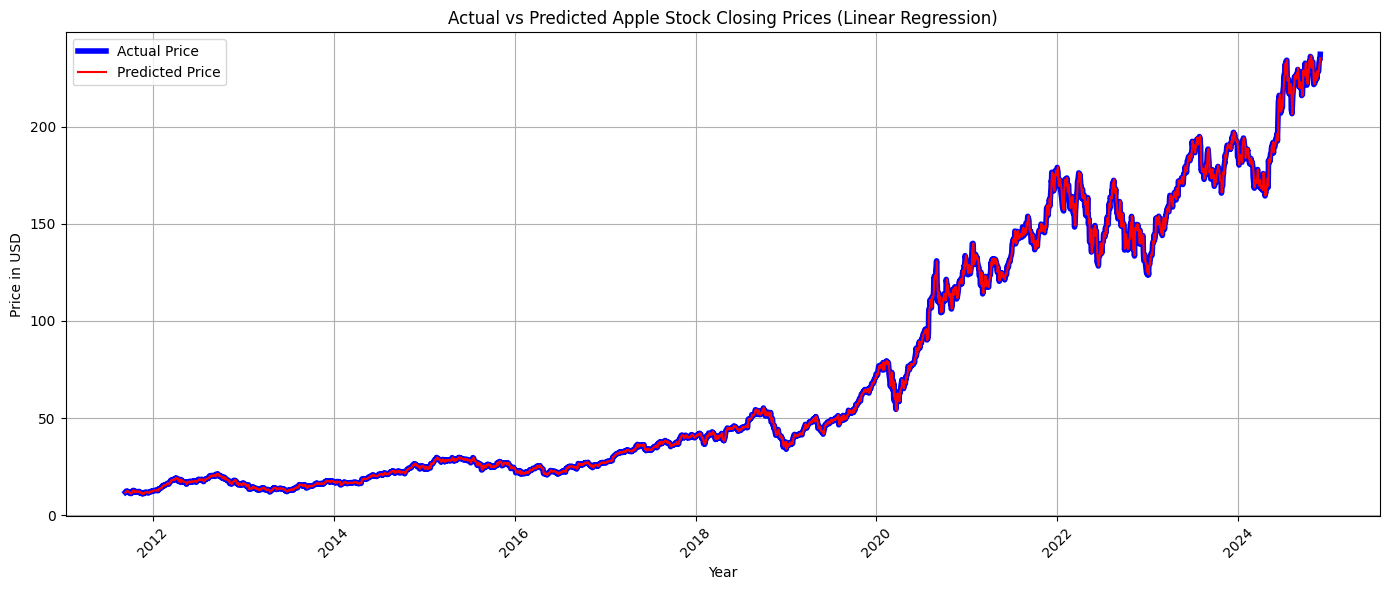

In [9]:
print("Mean Squared Error:", mse)
print("R² Score:", r2_rounded)
# Extract the date index for the test set
date_index = data.index[-len(y_test):]

# Plot actual vs predicted values with dates
plt.figure(figsize=(14, 6))
plt.plot(date_index, y_test, label='Actual Price', color='blue', linewidth=4)
plt.plot(date_index, predictions, label='Predicted Price', color='red')
plt.title('Actual vs Predicted Apple Stock Closing Prices (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the model
model = LinearRegression()

# Perform cross-validation and calculate R² scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Calculate the average R² score and round to 4 decimal places
average_r2 = round(np.mean(cv_scores), 4)

print("Cross-Validation R² Score:", average_r2)

Cross-Validation R² Score: 0.9935


# 🧠 LSTM Model for Apple Stock **Prediction**

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and prepare data
data = pd.read_csv('/content/Apple_1980_2024.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values('Date')
data.set_index('Date', inplace=True)

# Use only 'Close' price for LSTM
close_data = data[['Close']].values

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test
split = int(0.7 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# R² score
r2 = r2_score(y_test_inv, y_pred_inv)
print("LSTM Model R² Score:", round(r2, 4))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.6756e-05
Epoch 2/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3.0357e-07
Epoch 3/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.5926e-07
Epoch 4/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.6824e-07
Epoch 5/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5843e-07
Epoch 6/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2269e-07
Epoch 7/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.9400e-07
Epoch 8/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.9012e-07
Epoch 9/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.3704e-07
Epoch 10/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.2128e-07
Epoch 11/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9038e-07
Epoch 12/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1120e-07
Epoch 13/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.6729e-07
Epoch 14/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1755e-07
E

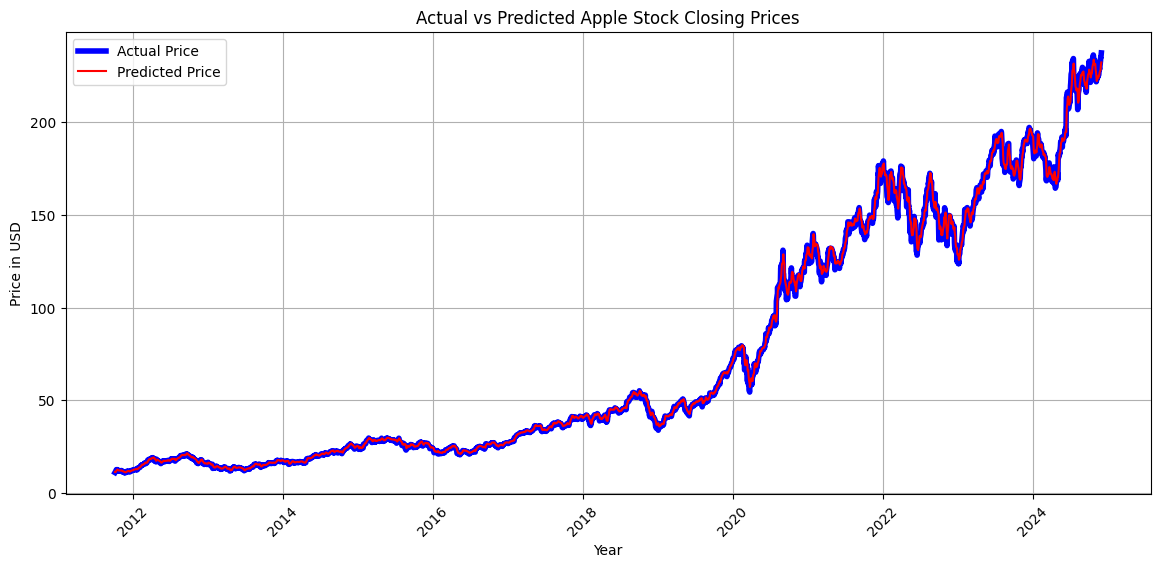

LSTM Model R² Score: 0.9989


In [21]:
import matplotlib.pyplot as plt

# Extract the date index for the test set
# Since we used a sequence length, we need to offset the index accordingly
date_index = data.index[-len(y_test):]

# Plot actual vs predicted values with dates
plt.figure(figsize=(14, 6))
plt.plot(date_index, y_test_inv, label='Actual Price', color='blue',linewidth=4)
plt.plot(date_index, y_pred_inv, label='Predicted Price', color='red')
plt.title('Actual vs Predicted Apple Stock Closing Prices')
plt.xlabel('Year')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
print("LSTM Model R² Score:", round(r2, 4))

In [17]:
import numpy as np
import gradio as gr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and prepare data
data = pd.read_csv('/content/Apple_1980_2024.csv')
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

# Prediction function
def predict_future(open_price, high_price, low_price, close_price, volume):
    input_data = np.array([[open_price, high_price, low_price, close_price, volume]])
    prediction = model.predict(input_data)[0]
    return f"Predicted Next Day Close Price: ${prediction:.2f}"

# Gradio interface
interface = gr.Interface(
    fn=predict_future,
    inputs=[
        gr.Number(label="Open Price"),
        gr.Number(label="High Price"),
        gr.Number(label="Low Price"),
        gr.Number(label="Close Price"),
        gr.Number(label="Volume")
    ],
    outputs="text",
    title="Apple Stock Price Predictor",
    description="Enter today's stock data to predict tomorrow's closing price."
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bd9c42b09cf3721950.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [16]:
import numpy as np
import gradio as gr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load and prepare data
data = pd.read_csv('/content/Apple_1980_2024.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values('Date')
data.set_index('Date', inplace=True)

# Use only 'Close' price for LSTM
close_data = data[['Close']].values

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Prediction function for Gradio
def predict_future():
    last_60_closing_prices = close_data[-60:]
    input_data = np.array(last_60_closing_prices).reshape((1, seq_length, 1))
    input_scaled = scaler.transform(input_data.reshape(-1, 1)).reshape((1, seq_length, 1))
    prediction_scaled = model.predict(input_scaled)
    prediction = scaler.inverse_transform(prediction_scaled)[0][0]
    return f"Predicted Next Day Close Price: ${prediction:.2f}"

# Gradio interface
interface = gr.Interface(
    fn=predict_future,
    inputs=None,
    outputs="text",
    title="Apple Stock Price Predictor (LSTM)",
    description="Click 'Generate' to predict the next day's closing price based on the last 60 closing prices."
)

interface.launch()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8.7992e-05
Epoch 2/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.6074e-06
Epoch 3/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.6029e-06
Epoch 4/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.3961e-06
Epoch 5/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.3322e-06
Epoch 6/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2992e-06
Epoch 7/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.3033e-06
Epoch 8/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.4847e-07
Epoch 9/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.7166e-07
Epoch 10/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3425e-06
Epoch 11/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.9168e-07
Epoch 12/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.8723e-07
Epoch 13/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.6238e-07
Epoch 14/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7.4545e-07
E